In [120]:
filepath = 'E:\datathon'
import glob
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as datetime
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange,
    Row
)
from bokeh.plotting import figure
from bokeh.palettes import Spectral
from math import pi
from bokeh.palettes import Category20c
from plotly import tools

# import holoviews as hv #There is a reason we have to do this here but its not important. Holoviews is the next library
# hv.extension('bokeh')

In [290]:
filepath = 'E:\datathon'
list_files = glob.glob(filepath + '\*csv')
lis_df = []
for files in list_files:
    df = pd.read_csv(files)
    lis_df.append(df)

In [3]:
#clickstreams_with_purchase
click_without_purchase = lis_df[0]
click_with_purchase = lis_df[1]
clickstream_dt = pd.concat([click_with_purchase, click_without_purchase])

C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




# click with purchases

In [6]:
x= click_with_purchase.groupby(['customer_id', 'date']).size().reset_index(name= 'count')
y = x.groupby('customer_id')['count'].mean().reset_index(name= 'mean')

In [7]:
#filter only number 
lim = y[y['mean']< 100]
len(lim)

109861

In [8]:
# c;lick without purchases
z = click_without_purchase.groupby(['customer_id', 'date']).size().reset_index(name ='count')
zz = z.groupby('customer_id')['count'].mean().reset_index(name = 'mean')
zz.dropna(inplace= True)

In [9]:
lim_nt_purchase = zz[zz['mean']< 100]

C:\Users\Girijesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



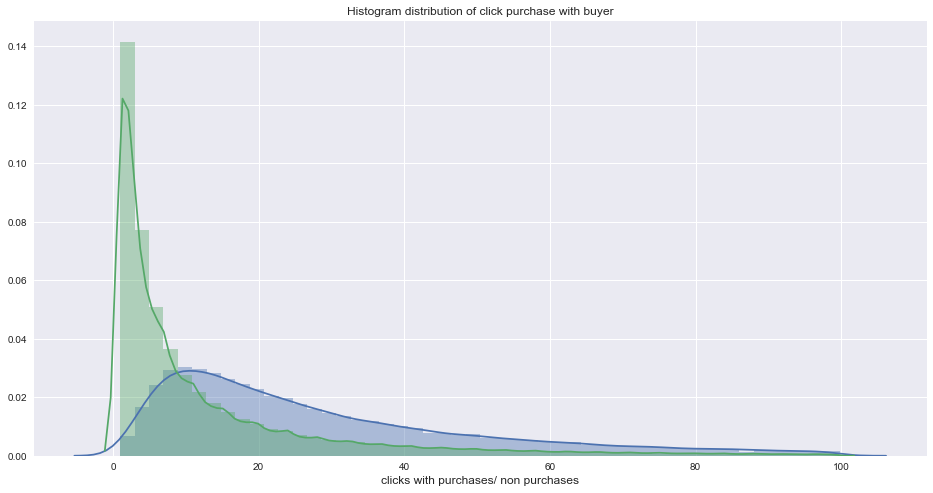

In [130]:
plt.figure(figsize= (16,8))
sns.distplot(lim['mean'].values)
sns.distplot(lim_nt_purchase['mean'].values)
plt.xlabel('clicks with purchases/ non purchases', fontsize = 12)
plt.title ('Histogram distribution of click purchase with buyer')
plt.show()

In [23]:
# trend analysis
click_with_purchase[['hours', 'mins', 'secs']] = click_with_purchase['time'].astype(str).str.split(':', expand = True).astype(int)

In [24]:
buying_time = click_with_purchase.groupby('hours').size().reset_index(name = 'count')
buying_time.head(2)

,hours,count
0,0,387183
1,1,262968


In [25]:
#Purchase time of consumers
trace = go.Scatter(
    y = buying_time['count'].values,
    x = buying_time['hours'].values,
    name = 'purchase clicks',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
    )    
layout = dict(
    title = 'Purchase time of consumers',
    xaxis = dict(title = 'Time'),
    yaxis = dict(title = 'Counts'),
)

data = [trace]
fig = dict(data = data, layout = layout)

py.iplot(fig, filename = 'dot line')

In [176]:
click_with_purchase['NSM'] = click_with_purchase['hours']*3600 + click_with_purchase['mins']*60 + click_with_purchase['secs']

In [6]:
click_with_purchase['date'] = pd.to_datetime(click_with_purchase['date'])

In [13]:
click_with_purchase['dates'] = click_with_purchase['date'].dt.dayofweek

In [15]:
# Map the day 
day = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday',3: 'Wednesday', 4: 'Thurday', 5: 'Friday', 6: 'Saturday'}
click_with_purchase['day'] = click_with_purchase['dates'].replace(day)

In [17]:
purchase_day = click_with_purchase.groupby('day').size().reset_index(name= 'count')

In [21]:
trace = go.Scatter(
    x = purchase_day['day'].values,
    y = purchase_day['count'].values, 
    name = 'click counts')
trace0 = go.Scatter(
    x = )
layout = dict(title = 'buyers clicks in a week',
             xaxis = dict(title = 'day'), 
             yaxis = dict(title = 'counts'))
fig = dict(data = [trace], layout = layout)
py.iplot(fig, filename= 'clickcounts_purchasers')

# Consumer Behaviour using Page Views of People Buying :
Frequency of Pages people have clicked Products options more often than HotDeals page. 
It means two things either the people are not concerned in paying more money for paying when buying from Wayfair. 
or the Hot Deals page deals doesnot attract customers.

In [100]:
# len(click_with_purchase['page_viewed'].unique())
page_views = click_with_purchase[['page_viewed', 'customer_id']].groupby(['page_viewed'])['customer_id']\
.count().reset_index(name  = 'count').sort_values(['count'], ascending  = False)

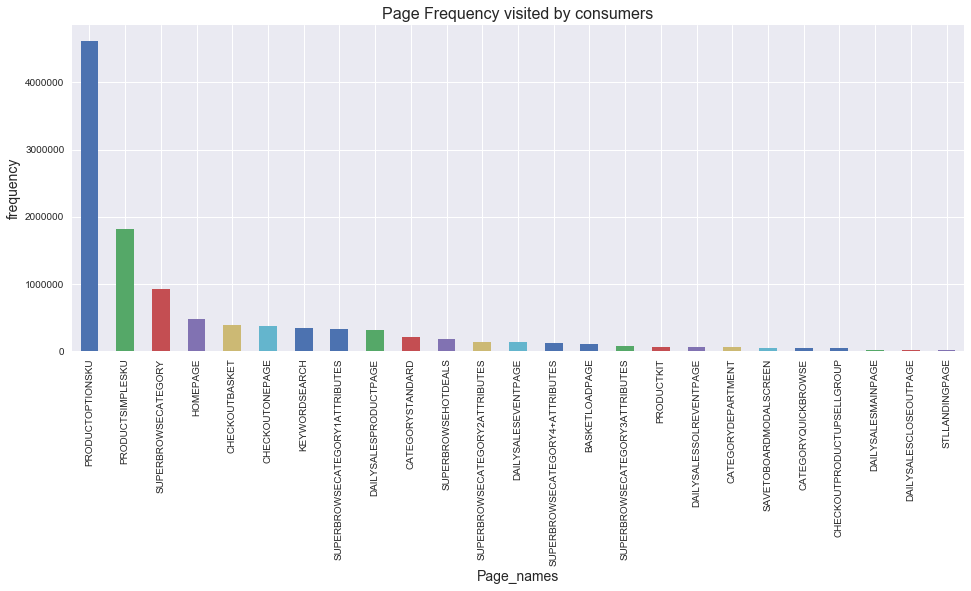

In [117]:
page_labels = [name for name in page_views['page_viewed']]
plt.figure(figsize= (16, 6))
ax = page_views['count'].plot(kind = 'bar')
ax.set_xlabel('Page_names', fontsize = 14)
ax.set_ylabel('frequency', fontsize = 14)
ax.set_xticklabels(page_labels)
plt.title('Page Frequency visited by consumers', fontsize= 16)
plt.show()

In [7]:
orders_ = lis_df[3]
orders_.head(5)

,order_product_id,order_id,wayfair_product_id,wayfair_website_id,order_date,order_time,customer_id,customer_zip,quantity_ordered
0,8.344710e+18,1.073040e+17,8.089580e+18,Wayfair,7/19/18,9:48:02,3.243950e+18,29464,1
1,7.897050e+18,9.115090e+17,4.407090e+18,Wayfair,7/21/18,15:04:23,7.606760e+18,10928,1
2,3.742700e+17,9.115090e+17,1.327620e+18,Wayfair,7/21/18,15:04:23,7.606760e+18,10928,1
3,7.072690e+18,5.760940e+18,7.293640e+18,Wayfair,7/22/18,21:56:42,3.106940e+18,6712,1
4,7.307240e+18,2.708890e+18,7.264500e+18,Wayfair,7/21/18,12:55:20,1.390570e+18,2468,1


In [8]:
orders_['order_date'] = pd.to_datetime(orders_['order_date'])

In [9]:
orders_['order_time'] = pd.to_datetime(orders_['order_time'])

In [10]:
orders_['hours'] = orders_['order_time'].dt.hour
orders_['date'] = orders_['order_date'].dt.dayofweek

In [11]:
day = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday',3: 'Wednesday', 4: 'Thurday', 5: 'Friday', 6: 'Saturday'}
orders_['date'] = orders_['date'].replace(day)
# orders_.head(4)

In [22]:
quant_order_day = orders_.groupby(['date', 'hours'])['quantity_ordered'].sum().reset_index(name = 'total_quantity_ordered')

In [24]:
result = quant_order_day.pivot(index = 'date', columns = 'hours', values = 'total_quantity_ordered')
# x_label = [dates for data]
y_label = np.asarray(quant_order_day['date'])

# Heatmap shows Saturday is the best day for ordering and most appropriate time is 8 pm when people prefer ordering.
Second Observations: 1 pm to 11 pm is prefered time for ordering

Third Observations: Friday and Thursday are second best days to order

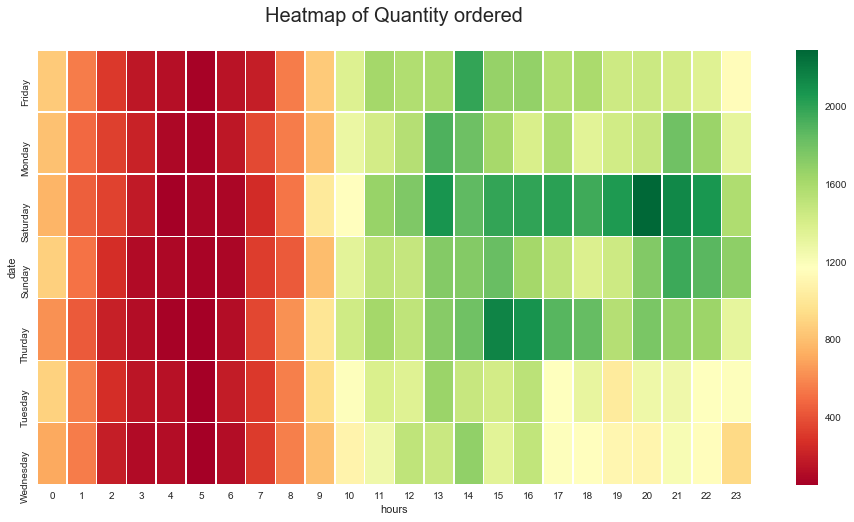

In [187]:
fig, ax = plt.subplots(figsize = (16,8))
plt.title("Heatmap of Quantity ordered", fontsize = 20)
ax.title.set_position([0.5, 1.05])
ax.set_xticks([])
ax.set_yticks([])
plt.legend("Total_quantity ordered")

sns.heatmap(result, fmt="", cmap = 'RdYlGn', linewidths= 0.5, ax = ax)
plt.show()

In [ ]:
#Main markets from which Wayfair get hits maximum orders is California, Texas and NewYork

In [6]:
#Find the which part of the US are buying the maximum:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


In [19]:
orders_cat = orders_.copy()
for col in state_order.columns:
    state_order[col] = state_order[col].astype(str)
state_order['text'] = state_order['state'] + 'quantity_ordered' + state_order['cum_order_state'] 

data = [dict(
    type = 'choropleth', 
    colorscale = scl, 
    autocolorscale = False, 
    locations = state_order['state'],
    z = state_order['cum_order_state'], 
    locationmode = 'USA-states', 
    marker = dict(
        line = dict(
            color = 'rgb(255, 255, 22)')
    ))]

layout1 = dict(
        title = 'State wise Quantity ordered in US',
        geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict(data = data, layout = layout1)
py.iplot(fig, filename = 'worldplot')

In [14]:
#Rental Prices:
rental_prices = lis_df[5]

In [15]:
rental_prices['zipcode'] = rental_prices['zipcode'].astype(str)
rental_prices.columns

Index(['zipcode', 'city', 'state', 'metro', 'county', 'month', '1_br_total',
       '2_br_total', '3_br_total', '4_br_total', '5+_br_total', '1_br_psqft',
       '2_br_psqft', '3_br_psqft', '4_br_psqft', '5+_br_psqft',
       'avg_house_size'],
      dtype='object')

In [16]:
#Merge Rental and Prices
order_rental = pd.merge(rental_prices, orders_, left_on= 'zipcode', right_on= 'customer_zip', how= 'outer')
# order_rental1 = order_rental.dropna(subset= 'quantity_order')

#
# codes_x['COUNTYNAME'] =codes_x['COUNTYNAME'].astype(str)
#Merge the codes into order_rental:
# order_rental = pd.merge(order_rental, codes_x, left_on= "county", right_on= "COUNTYNAME", how='outer')

#
# order_rental1 = order_rental[['state', 'quantity_ordered', 'COUNTYFP']]


In [18]:
state_order = order_rental.groupby(['state'])['quantity_ordered'].sum().reset_index(name = 'cum_order_state')

In [98]:
#metro order
metro_order = order_rental1.groupby(['metro'])['quantity_ordered'].sum().reset_index(name = 'cum_order_metro')

In [162]:
codes_x = pd.read_csv(r"E:\datathon\problem_stat\WayfairDatathon_ProblemStatment_Materials\national_county.txt", sep = ',',header= None, index_col= None)

In [173]:
codes_x.columns = ["STATE", "STATEFP", "COUNTYFP", "county", "CLASSFP"]
codes_x['county'] = codes_x['county'].apply(lambda x: x.split(" ")[0])

In [175]:
x = order_rental.merge(codes_x, on= 'county', how= 'outer')

In [181]:

county_order = x[['state','county', 'quantity_ordered', 'county', 'COUNTYFP', 'STATEFP']].dropna()

In [178]:
#county order
county_order = county_order.groupby(['COUNTYFP'])['quantity_ordered'].sum().reset_index(name = 'cum_order_county')

In [189]:
# colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
#               "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
#               "#08519c","#0b4083","#08306b"]
# endpts = list(np.linspace(1, 12, len(colorscale) - 1))
# county_order["fips"] = county_order["COUNTYFP"]+ county_order['COUNTYFP']
# fips = county_order['fips'].tolist()
# values = county_order['quantity_ordered'].tolist()

# fig = ff.create_choropleth(
#     fips=fips, values=values, scope=['usa'],
#     binning_endpoints=endpts, colorscale=colorscale,
#     show_state_data=False,
#     show_hover=True, centroid_marker={'opacity': 0},
#     asp=2.9, title='USA by Unemployment %',
#     legend_title='% unemployed'
# )
# py.iplot(fig, filename = 'plot')

# Analysis of Wayfair Order Product!

In [24]:
order = lis_df[3]
wayfair_prods = lis_df[4]
taxes = lis_df[7]

In [130]:
order_prod = pd.merge(order, wayfair_prods, left_on= 'wayfair_product_id', right_on= 'product_id', how= 'outer')

In [46]:
#sales
order_prod['sales'] = order_prod['quantity_ordered']*order_prod['onsite_price']
order_prod_sales = order_prod[['sales', 'onsite_price', 'product_name', 'category_name', 'on_promotion' ]]

In [81]:
category_sales = order_prod_sales.groupby('category_name')['sales'].sum().reset_index(name = 'category_sales').sort_values('category_sales', ascending = False)

In [115]:
category_sales['% category sales'] = (category_sales['category_sales']/category_sales['category_sales'].sum())*100
top_20_category_sales = category_sales.iloc[:19]
top_20_category_sales.loc[20] = ['rest_categories', category_sales['category_sales'].iloc[19:].sum(), category_sales['% category sales'].iloc[19:].sum()]
top_20_category_sales.columns


Index(['category_name', 'category_sales', '% category sales'], dtype='object')

#1.From the pie chart - Area Rugs, Wall Art, Vanities, Sofas, Tubs & Whirlpools are the top 5 categoriesby by sales in Wayfair.
#2.Wayfair sells products in almost 900 categories. From the pie chart top 20 categories sales contributes the 45% of the sales and rest 880 categories contributes the rest 55% of the sales.

In [212]:
# custom data
labels = top_20_category_sales['category_name']
count_cat = top_20_category_sales['category_sales']
source_pie = go.Pie(labels = labels, 
                    values = count_cat, 
                    
                    showlegend=False, name='Product Categories', textinfo='label+percent')

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Pie Category Sales Wayfair')
fig = go.Figure(data = [source_pie], layout = layout)


py.iplot(fig, filename='basic_pie_chart')

# Top product top 20 category sales wise v/s in overall categories

#1. Next we tried to compare the product sales from all the 900 categories vs product sales from top 20 categories.

In [201]:
# Next we try to find out whic product has highest sales in top 20 categories:
prod_overall = order_prod_sales.groupby('product_name')['sales'].sum().reset_index(name = 'top20_over_sales').sort_values(by = 'top20_over_sales', ascending = False).dropna()
top20_prod_overall = prod_overall[:19]
top20_prod_overall.loc[20] = ['rest_product', prod_overall['top20_over_sales'][19:].sum()]

#getting list of products in top 20 categories
category_list = top_20_category_sales.category_name[:-1].values.tolist()
top_20_prod_df =order_prod_sales[order_prod_sales['category_name'].isin(category_list)].dropna()

prod_categorywise= top_20_prod_df.groupby('product_name')['sales'].sum().reset_index(name= 'top20_catsales').sort_values(by= 'top20_catsales', ascending = False)[:20]
top20_prod_categorywise = prod_categorywise[:19]
top20_prod_categorywise.loc[20] = ['rest_product', prod_categorywise['top20_catsales'][19:].sum()]

1. From the top 20 products in overall categories we found that Vega Vertical Sideboard is contributing 0.3% sales. 
2. Also the rest products contributes 92.7% to the sales.~

In [207]:
#Piechart1
labels = top20_prod_overall['product_name']
count_cat = top20_prod_overall['top20_over_sales']
source_pie = go.Pie(labels = labels, 
                    values = count_cat, 
                    showlegend=False, name='Product Categories', textinfo='label+percent')



layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Pie Category Sales Wayfair')
fig = go.Figure(data = [source_pie], layout = layout)


py.iplot(fig, filename='basic_pie_chart')




#2. From the PIE Chart we found the top 20 products sold sales categorywise:
- Bahama Leather Recling Sofa, Brookhaven Executive Drawer contributed 18 % combined in the sales

In [214]:
#Piechart2

labels1 = top20_prod_categorywise['product_name']
count_cat1= top20_prod_categorywise['top20_catsales']
source_pie1 = go.Pie(labels = labels1, 
                    values = count_cat1, 
                    showlegend=False, name='Product Categories', textinfo='label+percent')

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Top 20 products sales from top 20 categorywise Wayfair')
fig = go.Figure(data = [source_pie1], layout = layout)


py.iplot(fig, filename='basic_pie_chart')




# Impact of reviews and promotions advertised by Wayfair!!!


In [227]:
category_promo_reviews_sales = order_prod[['sales', 'on_promotion', 'num_reviews', 'category_name']]

#1. Sales on for reviews and promotions

1. Products which were top sellings little less in demand in terms of sales in non-promotional days.
 Wall Arts and Area Rugs looks outliers as the sales decreased during the promotional offers because Wayfair doesnot provide  much discouts or people were interested in buying products which were of more interest and heavily discounted.

2. All the other products mainted the trends of selling heavily during the promotional days.

In [236]:
cat_promo_sales = category_promo_reviews_sales.groupby(['on_promotion', 'category_name'])['sales'].sum().reset_index()
# cat_promom_sales0 = cat_promo_sales[cat_promo_sales['on_promotion'] == 0].sort_values(by = 'sales', ascending = False)
cat_promom_sales1 = cat_promo_sales[cat_promo_sales['on_promotion'] == 1].sort_values(by = 'sales', ascending = False)

In [251]:
prom_list1 = cat_promom_sales1['category_name'].values[:20].tolist()
cat_prom_sales1_0 = cat_promo_sales[cat_promo_sales['category_name'].isin(prom_list1)]
cat_prom_sal_10 = cat_prom_sales1_0.pivot(index = 'category_name', columns= 'on_promotion', values = 'sales')

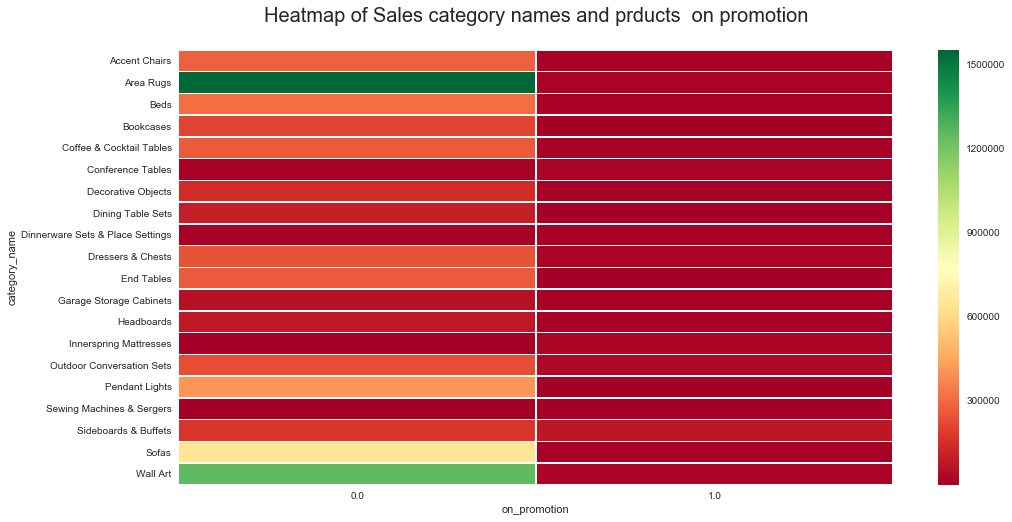

In [254]:
fig, ax = plt.subplots(figsize = (16,8))
plt.title("Heatmap of Sales based on category names and prducts  on promotion", fontsize = 20)
ax.title.set_position([0.5, 1.05])
ax.set_xticks([])
ax.set_yticks([])
plt.legend("")
sns.heatmap(cat_prom_sal_10, fmt="", cmap = 'RdYlGn', linewidths= 0.5, ax = ax)
plt.show()

# Next we try to find out the impact of reviews on sales 

In [255]:
order_prod.columns

Index(['order_product_id', 'order_id', 'wayfair_product_id',
       'wayfair_website_id', 'order_date', 'order_time', 'customer_id',
       'customer_zip', 'quantity_ordered', 'website_name', 'product_id',
       'product_name', 'category_name', 'description', 'manufacturer_name',
       'weight', 'dimension_1', 'dimension_2', 'dimension_3', 'num_reviews',
       'onsite_price', 'on_promotion', 'sales'],
      dtype='object')

In [273]:
reviews_sales = order_prod[['sales', 'num_reviews', 'on_promotion']].dropna(how= 'any')
sales_ = reviews_sales['sales'].values
reviews = reviews_sales['num_reviews'].values
promotion = reviews_sales['on_promotion']

In [274]:
trace0 = go.Scatter(
    x = sales_ , 
    y = reviews, 
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(22, 122, 122, .8)',
        line = dict(
            width = 0.1,
            color = promotion
        )
    ))

layout = dict(title = 'Reviews vs Sales',
              yaxis = dict(zeroline = False, title = 'Reviews'),
              xaxis = dict(zeroline = False, title = 'Sales')
             )

data = [trace0]
fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'scatterplot.jpg')

C:\Users\Girijesh\Anaconda3\lib\site-packages\plotly\plotly\plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


C:\Users\Girijesh\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [287]:
taxes['zipcode'] = taxes['zipcode'].astype(object)
order.customer_zip.dtypes
taxes.zipcode.dtypes

dtype('O')

In [284]:
x = pd.merge(taxes[['zipcode', 'agi_stub']],order, left_on='zipcode', right_on= 'customer_zip', how = 'outer')
x.isnull().any()

zipcode               True
agi_stub              True
order_product_id      True
order_id              True
wayfair_product_id    True
wayfair_website_id    True
order_date            True
order_time            True
customer_id           True
customer_zip          True
quantity_ordered      True
dtype: bool

In [285]:
x.head(3)

,zipcode,agi_stub,order_product_id,order_id,wayfair_product_id,wayfair_website_id,order_date,order_time,customer_id,customer_zip,quantity_ordered
0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
